[13, 7, 8, 13, 10, 7, 11, 8, 7, 6, 7, 8, 7, 13, 8, 16, 6, 12, 9, 5, 9, 9, 14, 4, 7, 12, 12, 6, 9, 6, 11, 7, 6, 10, 6, 11, 8, 9, 7, 8, 8, 7, 9, 11, 10, 8, 16, 5, 5, 14]


[None, None, None, None]

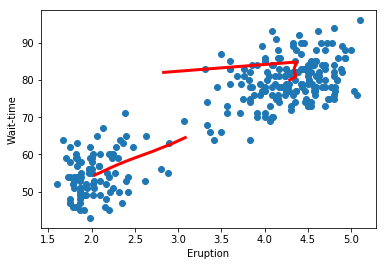

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import random
from sklearn.cluster import KMeans
%matplotlib inline

#Part 1a, Parse each file
data = np.loadtxt('oldG.txt');

eruptions = data[:, 1]
wait_time = data[:, 2]
plt.xlabel("Eruption")
plt.ylabel("Wait-time")
plt.scatter(eruptions, wait_time)

allData = np.array([eruptions,wait_time])

post_prob_1 = np.empty(len(eruptions))
post_prob_2 = np.empty(len(eruptions))
def GMMiteration(mean1, mean2, cov1, cov2):
    for i in range(len(eruptions)):
        post_prob_1[i] = multivariate_normal.pdf([eruptions[i],wait_time[i]], mean1, cov1)
        post_prob_2[i] = multivariate_normal.pdf([eruptions[i],wait_time[i]], mean2, cov2)
    
    check = np.sum((post_prob_1+post_prob_2) == 0)
    while (check > 0):
        mean1 = np.array([random.uniform(min(eruptions), max(eruptions)), random.uniform(min(wait_time), max(wait_time))])
        mean2 = np.array([random.uniform(min(eruptions), max(eruptions)), random.uniform(min(wait_time), max(wait_time))])
        
        for i in range(len(eruptions)):
            post_prob_1[i] = multivariate_normal.pdf([eruptions[i],wait_time[i]], mean1, cov1)
            post_prob_2[i] = multivariate_normal.pdf([eruptions[i],wait_time[i]], mean2, cov2)
        
        check = np.sum((post_prob_1+post_prob_2) == 0)

    class1_prob = post_prob_1 / (post_prob_1 + post_prob_2)
    class2_prob = post_prob_2 / (post_prob_1 + post_prob_2)
    
    class1_erup_mean = np.sum(class1_prob * eruptions) / np.sum(class1_prob)
    class1_wait_mean = np.sum(class1_prob * wait_time) / np.sum(class1_prob)
    class2_erup_mean = np.sum(class2_prob * eruptions) / np.sum(class2_prob)
    class2_wait_mean = np.sum(class2_prob * wait_time) / np.sum(class2_prob)
    
    class1_mean = np.array([class1_erup_mean, class1_wait_mean])
    class2_mean = np.array([class2_erup_mean, class2_wait_mean])
    
    cov_1 = np.cov(allData, aweights= class1_prob)
    cov_2 = np.cov(allData, aweights= class2_prob)
    
    
    return class1_mean, class2_mean, cov_1, cov_2

termination = []
for j in range(50):
    mean1 = np.array([random.uniform(min(eruptions), max(eruptions)), random.uniform(min(wait_time), max(wait_time))])
    mean2 = np.array([random.uniform(min(eruptions), max(eruptions)), random.uniform(min(wait_time), max(wait_time))])
    cov1 = np.array([[1,0],[0,1]])
    cov2 = np.array([[1,0],[0,1]])
    
    m1_vec_x = []
    m1_vec_y = []
    m2_vec_x = []
    m2_vec_y = []
    
    m1_vec_x.append(mean1[0])
    m1_vec_y.append(mean1[1])
    for i in range(100):
        mean1, mean2, cov1, cov2 = GMMiteration(mean1,mean2,cov1,cov2)
        m1_vec_x.append(mean1[0])
        m1_vec_y.append(mean1[1])
        m2_vec_x.append(mean2[0])
        m2_vec_y.append(mean2[1])
    
        if (i == 0):
            continue
        if abs(m1_vec_x[i] - m1_vec_x[i - 1])/m1_vec_x[i] < 0.0001 and abs(m1_vec_y[i] - m1_vec_y[i - 1])/m1_vec_y[i] < 0.0001 and abs(m2_vec_x[i] - m2_vec_x[i - 1])/m2_vec_x[i] < 0.0001 and abs(m2_vec_y[i] - m2_vec_y[i - 1])/m2_vec_y[i] < 0.0001:
            termination.append(i)
            break


print(termination)
    
#plt.close()
lines = plt.plot(m1_vec_x, m1_vec_y, m2_vec_x, m2_vec_y)
plt.setp(lines, color='r', linewidth=3.0)


(array([ 4.,  6.,  9.,  8.,  6.,  7.,  3.,  3.,  2.,  2.]),
 array([  4. ,   5.2,   6.4,   7.6,   8.8,  10. ,  11.2,  12.4,  13.6,
         14.8,  16. ]),
 <a list of 10 Patch objects>)

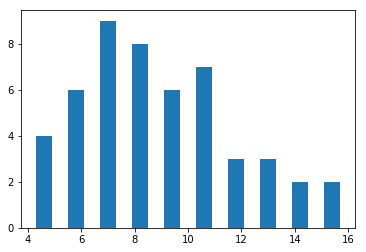

In [23]:
plt.hist(termination, rwidth=0.5)

In [45]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data[:,[1,2]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [46]:
mean1, mean2 = kmeans.cluster_centers_

cov1 = np.cov(allData ,aweights=kmeans.labels_)

cov2 = np.cov(allData, aweights=(1 - kmeans.labels_))
print(cov1)
print(cov2)
print(ctd1)
print(ctd2)


[[  0.15583707   0.99561869]
 [  0.99561869  34.75505051]]
[[  0.17865587   0.76756385]
 [  0.76756385  31.66690466]]
[  2.09433  54.75   ]
[  4.29793023  80.28488372]


[4]


[None, None, None, None]

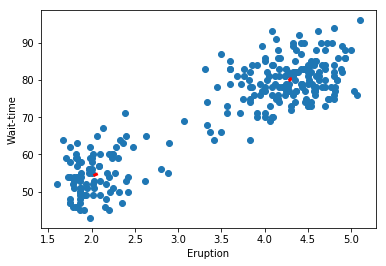

In [47]:
termination = []

#     mean1 = np.array([random.uniform(min(eruptions), max(eruptions)), random.uniform(min(wait_time), max(wait_time))])
#     mean2 = np.array([random.uniform(min(eruptions), max(eruptions)), random.uniform(min(wait_time), max(wait_time))])
#     cov1 = np.array([[1,0],[0,1]])
#     cov2 = np.array([[1,0],[0,1]])
    
m1_vec_x = []
m1_vec_y = []
m2_vec_x = []
m2_vec_y = []
    
m1_vec_x.append(mean1[0])
m1_vec_y.append(mean1[1])
for i in range(100):
    mean1, mean2, cov1, cov2 = GMMiteration(mean1,mean2,cov1,cov2)
    m1_vec_x.append(mean1[0])
    m1_vec_y.append(mean1[1])
    m2_vec_x.append(mean2[0])
    m2_vec_y.append(mean2[1])
    
    if (i == 0):
        continue
    if abs(m1_vec_x[i] - m1_vec_x[i - 1])/m1_vec_x[i] < 0.0001 and abs(m1_vec_y[i] - m1_vec_y[i - 1])/m1_vec_y[i] < 0.0001 and abs(m2_vec_x[i] - m2_vec_x[i - 1])/m2_vec_x[i] < 0.0001 and abs(m2_vec_y[i] - m2_vec_y[i - 1])/m2_vec_y[i] < 0.0001:
        termination.append(i)
        break


print(termination)


eruptions = data[:, 1]
wait_time = data[:, 2]
plt.xlabel("Eruption")
plt.ylabel("Wait-time")
plt.scatter(eruptions, wait_time)
lines = plt.plot(m1_vec_x, m1_vec_y, m2_vec_x, m2_vec_y)
plt.setp(lines, color='r', linewidth=3.0)

In [43]:
print(ctd1)
print(ctd2)

[  2.09433  54.75   ]
[  4.29793023  80.28488372]


(array([ 49.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

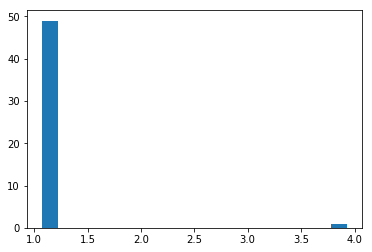

In [44]:
plt.hist(termination, rwidth=0.5)

In [29]:
termination

[10,
 16,
 14,
 6,
 8,
 7,
 6,
 9,
 10,
 14,
 13,
 11,
 16,
 8,
 14,
 5,
 9,
 6,
 13,
 8,
 9,
 9,
 7,
 6,
 15,
 11,
 8,
 13,
 10,
 15,
 9,
 11,
 13,
 8,
 4,
 6,
 6,
 10,
 8,
 12,
 9,
 15,
 10,
 8,
 4,
 7,
 9,
 5,
 5,
 5]